In [16]:
import math
import matplotlib.pyplot as plt
import numpy as np

class logistic:
  def __init__(self,weights,bias,epochs,learning_rate,tolerance):
    self.weights=weights
    self.bias=bias
    self.epochs=epochs
    self.learning_rate=learning_rate
    self.tolerance=tolerance

  def cross_entropy_loss(self, y, y_hat):
    loss = 0
    for i in range(len(y)):
      loss += -y[i] * math.log(y_hat[i]) - (1 - y[i]) * math.log(1 - y_hat[i])
    return loss / len(y)

  def compute_y_hat(self,x):
    return sum(x[i]*self.weights[i] for i in range(len(self.weights))) + self.bias

  def compute_gradient(self,X,y):
    n_samples=len(X)
    n_features=len(X[0])
    dw=[0]*n_features
    db=0

    for j in range(n_samples):
      y_pred=self.compute_y_hat(X[j])
      error=y_pred-y[j]
      for i in range(n_features):
        dw[i]+=error*X[j][i]
      db+=error
    dw = [dw_i / n_samples for dw_i in dw]
    db /= n_samples

    return dw,db

  def descent(self, dw, db):
    for i in range(len(self.weights)):
      self.weights[i] -= self.learning_rate * dw[i]
    self.bias -= self.learning_rate * db

  def sigmoid(self, z):
        return 1 / (1 + math.exp(-z))

  def fit(self,X,y):
    prev_loss=float('-inf')
    for epoch in range(self.epochs):
      y_hat=[self.sigmoid(self.compute_y_hat(X[i])) for i in range (len(X))]
      loss=self.cross_entropy_loss(y,y_hat)
      dw,db=self.compute_gradient(X,y)
      self.descent(dw,db)

      if abs(prev_loss - loss) < self.tolerance:
                print("Converged")
                break

      prev_loss=loss

  def predict(self, X):
        return [self.compute_y_hat(x) for x in X]

  def visualize(self, X, y):
        """Visualize the logistic regression decision boundary and sigmoid function."""
        x_values = np.linspace(-10, 10, 100)
        sigmoid_values = [self.sigmoid(x) for x in x_values]

        plt.figure(figsize=(10, 5))

        # Plot sigmoid function
        plt.plot(x_values, sigmoid_values, label="Sigmoid Function", color="blue")

        # Plot decision boundary (linear function before sigmoid)
        linear_x_values = np.linspace(min([x[0] for x in X]), max([x[0] for x in X]), 100)
        decision_boundary = [- (self.bias + self.weights[0] * x) / self.weights[1] for x in linear_x_values]

        # Plot data points
        X_data = np.array(X)
        y_data = np.array(y)

        plt.scatter(X_data[:, 0], y_data, color='red', label="Data Points")

        # Titles and labels
        plt.axhline(0.5, color="gray", linestyle="--", label="Decision Boundary")
        plt.xlabel("Feature X")
        plt.ylabel("Sigmoid Output")
        plt.legend()
        plt.title("Logistic Regression Visualization")
        plt.show()




Converged


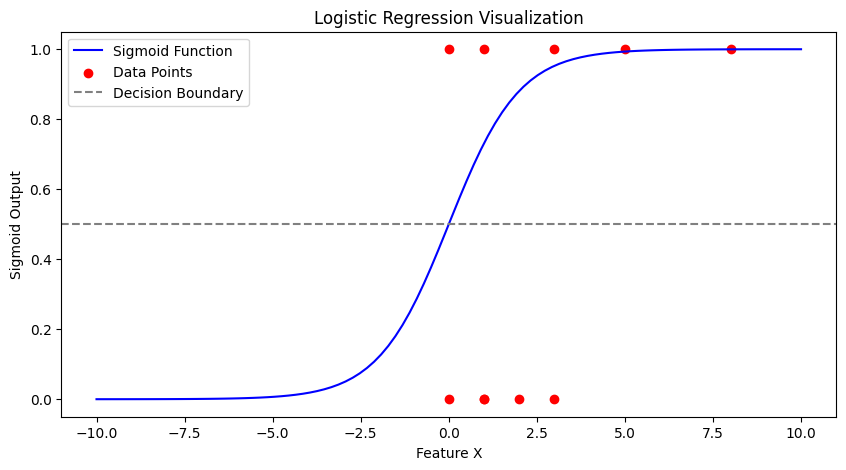

In [17]:
X = [
    [5, 10], [0, 2], [1, 3], [8, 10], [3, 5],  # Spam emails (1)
    [0, 0], [2, 1], [1, 0], [3, 2], [1, 1]   # Non-spam emails (0)
]
y = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
model = logistic(weights=[0, 0], bias=0, epochs=500, learning_rate=0.05, tolerance=1e-4)
model.fit(X, y)
model.visualize(X, y)
